In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# loading our dataframes
#we will be using df_h for our Honeypot Dataset sample. 

df_h = pd.read_csv('../Cybersecurity-Intrusion-Analysis/AWS_Honeypot_marx-geo.csv')
#Let's figure out what do we have in our dataframes 

#First let's see what is the shappe of each dataframe 
print("Honeypot Dataset:", df_h.shape)

Honeypot Dataset: (451581, 16)


In [6]:
df_h.isna().sum()

datetime            0
host                0
src                 0
proto               0
type           406770
spt             44811
dpt             44811
srcstr              0
cc               3596
country          3634
locale         109469
localeabbr     119876
postalcode     365103
latitude         3469
longitude        3428
Unnamed: 15    451498
dtype: int64

In [7]:
new_df_h= df_h.drop('Unnamed: 15', axis= 1)

In [8]:
new_df_h

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451576,9/8/13 5:54,groucho-oregon,1922977453,TCP,NaN,62175.0,445.0,114.158.78.173,JP,Japan,Tokyo-to,13,NaN,35.6850,139.7514
451577,9/8/13 5:50,groucho-eu,1017974360,TCP,NaN,6000.0,8090.0,60.173.14.88,CN,China,Anhui Sheng,34,NaN,31.8639,117.2808
451578,9/8/13 5:55,groucho-oregon,3234358955,TCP,NaN,6000.0,1433.0,192.200.102.171,US,United States,California,CA,90017,34.0530,-118.2642
451579,9/8/13 5:55,groucho-tokyo,28142724,TCP,NaN,3555.0,445.0,1.173.108.132,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250


In [9]:
print("Columns of Honeypot Dataset:", new_df_h.columns)

Columns of Honeypot Dataset: Index(['datetime', 'host', 'src', 'proto', 'type', 'spt', 'dpt', 'srcstr',
       'cc', 'country', 'locale', 'localeabbr', 'postalcode', 'latitude',
       'longitude'],
      dtype='object')


In [10]:
#let's try to get our basic stat info from dataframes 
new_df_h.describe()

,src,type,spt,dpt,latitude,longitude
count,4.515810e+05,44811.000000,406770.000000,406770.000000,448112.000000,448153.000000
mean,2.154902e+09,7.514896,18685.461494,6684.258212,36.214115,48.751751
std,1.081011e+09,1.799866,19290.141746,14032.839799,194.251441,91.774739
min,1.677725e+07,0.000000,0.000000,0.000000,-43.533300,-175.000000
25%,1.169129e+09,8.000000,6000.000000,445.000000,30.666700,-4.000000
50%,2.031191e+09,8.000000,6000.000000,1433.000000,35.685000,106.000000
75%,3.164988e+09,8.000000,33461.000000,3389.000000,40.455500,118.777800
max,3.758094e+09,13.000000,65535.000000,65500.000000,20076.000000,178.416700


In [11]:
new_df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    451581 non-null  object 
 1   host        451581 non-null  object 
 2   src         451581 non-null  int64  
 3   proto       451581 non-null  object 
 4   type        44811 non-null   float64
 5   spt         406770 non-null  float64
 6   dpt         406770 non-null  float64
 7   srcstr      451581 non-null  object 
 8   cc          447985 non-null  object 
 9   country     447947 non-null  object 
 10  locale      342112 non-null  object 
 11  localeabbr  331705 non-null  object 
 12  postalcode  86478 non-null   object 
 13  latitude    448112 non-null  float64
 14  longitude   448153 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 51.7+ MB


In [12]:
new_df_h.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500


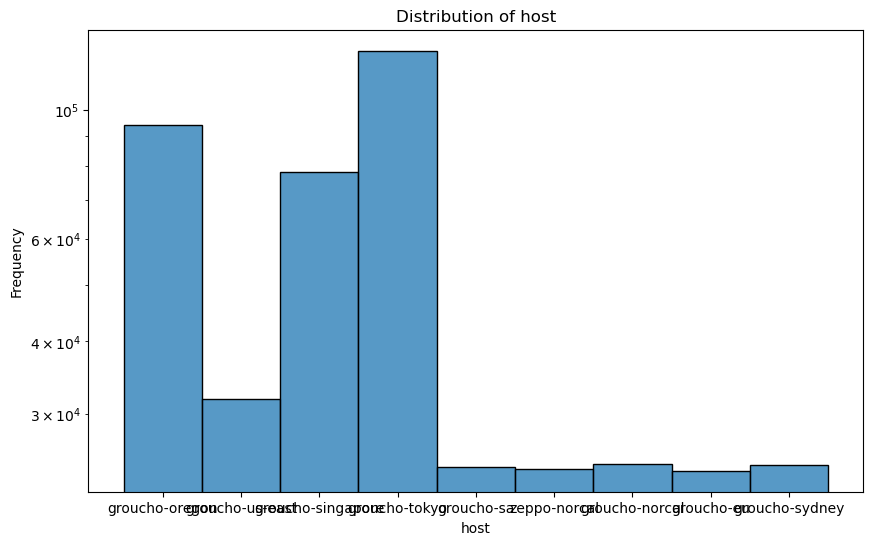

In [13]:
# Creating histogram to determine distribution of host interceptions 
plt.figure(figsize=(10, 6))
sns.histplot(new_df_h['host'], bins=50, kde=False)
plt.title('Distribution of host')
plt.xlabel('host')
plt.yscale("log")
plt.ylabel('Frequency')
plt.show()


In [14]:
new_df_h.value_counts(['country'])

country      
China            191394
United States     89982
Japan             17204
Iran              13042
Taiwan            12148
                  ...  
Burundi               2
Cape Verde            1
Bermuda               1
Barbados              1
Namibia               1
Name: count, Length: 177, dtype: int64

Text(0.5, 1.0, 'Histogram representation of countries that are intercepting')

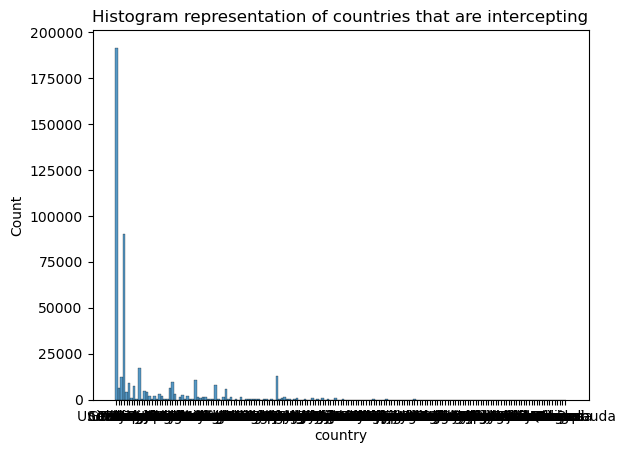

In [53]:
#let's visualize where they are intercepting from
sns.histplot(data = df_h, x = "country")
plt.title('Histogram representation of countries that are intercepting')

In [54]:
#let's sort our variables based on country and host status 
#first we need to create new section just with our variables 

country_host_h = df_h.groupby(['country', 'host']).size()
print("Country and their host status:", country_host_h)
print("   ")

Country and their host status: country      host             
Afghanistan  groucho-oregon       2
             groucho-sydney       1
             groucho-tokyo        2
             zeppo-norcal         2
Albania      groucho-eu           7
                                 ..
Zimbabwe     groucho-singapore    2
             groucho-sydney       1
             groucho-tokyo        3
             groucho-us-east      1
             zeppo-norcal         1
Length: 1133, dtype: int64
   
